In [3]:
#王琚2016011634
#实训时间：2018.11.19-

#导入鸢尾花数据集iris
from sklearn.datasets import load_iris
iris=load_iris()#载入数据集
#print(iris.data)
#鸢尾花数据集中有两个属性iris.data，iris.target，
#data是一个矩阵，每一列代表了萼片或花瓣的长宽，一共4列，每一行
#代表某个被测量的鸢尾植物，一共采样了150条记录。

/home/wangju/test/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wangju/test/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


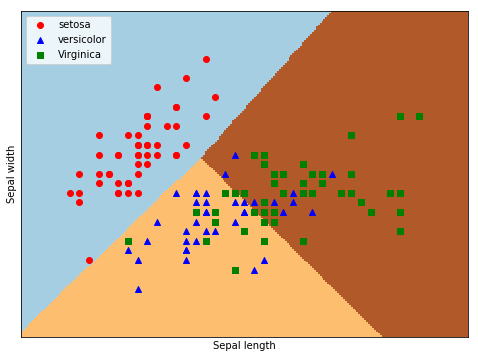

In [2]:
#任务一：将鸢尾花数据集画成图的形式
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

#载入数据集
iris=load_iris()
x=iris.data[:,:2]#获取花卉两列数据集(二维矩阵150，2)
y=iris.target#一维向量

#逻辑回归模型
lr=LogisticRegression(C=1e5)# C值的目标函数约束条件：s.t.||w||1<C，默认值是0，C值越小，则正则化强度越大。
lr.fit(x,y)
#初始化逻辑回归模型并进行训练，C=1e5表示目标函数


#meshgrid函数生成两个网格矩阵
#获取鸢尾花的两列数据，对应为花萼长度和宽度，每个点的坐标为（x，y），
#先取x二维数组的第一列（花萼长度）的最小值，最大值和步长h（设置为0.02）生成数组
#再取x二维数组的第二列（花萼宽度）的最小值，最大值和步长h生成数组
#再用meshgrid函数生成两个网格矩阵xx和yy
#np.arange()返回一个有终点和起点的固定步长的排列，如[1,2,3,4,5],起点是1，终点是5，步长为1(默认起点是0，步长为1)
#meshgrid(x,y)的作用是产生以x为行，y为列的矩阵
#最后得到两个矩阵xx和yy，它们行列数相同，行数为x的长度lenx，列数为y的长度leny，xx由leny个行向量x组成，yy由lenx个列向量组成
h=.02
min_x,max_x=x[:,0].min()-.5,x[:,0].max()+.5#第一列
min_y,max_y= x[:, 1].min() - .5, x[:, 1].max() + .5#第二列
xx,yy=np.meshgrid(np.arange(min_x,max_x, h), np.arange(min_y,max_y, h))


#pcolormesh函数将xx,yy两个网格矩阵和对应的预测结果Z绘制在图片上
#lr.predict()这句代码调用ravel()函数将xx和yy的两个矩阵转变为一维数组，两个矩阵大小相等，因此两个一维数组大小也相等
#np.c_[xx.ravel(), yy.ravel()]是获取矩阵
#总结上述操作：把第一列的花萼长度数据按h步长取等分作为行，并复制多行得到xx网格矩阵；
#再把第二列花萼宽度数据按h取等分作为列，并复制多列得到yy网格矩阵，最后将xx和yy矩阵都变成两个一维数组，调用np.c_[]函数组合成一个二维数组进行预测
#调用predict()函数进行预测，预测结果赋值给Z
#Z.reshape(xx.shape)调用reshape()函数修改形状，将其Z转换为两个矩阵（长度和宽度），则39501个数据转化为171*231的矩阵
#调用pcolormesh()函数将xx，yy两个网格矩阵和对应的预测结果Z绘制在图片上，可以发现输出为三个
#颜色区块，分布表示分类的三类区域。cmap=plt.cm.Paired表示绘图样式选择Paired主题。
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

#绘制散点图
#scatter()绘制散点图，第一个参数为第一列数据（长度），第二个参数为第二列数据（宽度）,第三四个参数为设置的颜色为红色，款式为圆圈，最后标记为setosa
plt.scatter(x[:50,0], x[:50,1], color='red',marker='o', label='setosa')
plt.scatter(x[50:100,0], x[50:100,1], color='blue', marker='^', label='versicolor')
plt.scatter(x[100:,0], x[100:,1], color='green', marker='s', label='Virginica') 
#x

#设置横纵坐标的名称
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
#xlim(xmin, xmax)和ylim(ymin, ymax)来调整x,y坐标范围
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#人为设置坐标轴的刻度显示的值。
plt.xticks(())
plt.yticks(())
#plt.legend()显示图例，loc设置图例显示的位置 ，值为2代表显示在upper left
plt.legend(loc=2) 
plt.show()

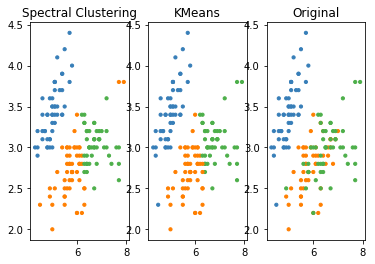

Accuracy: 81.33333333333333 %


In [3]:
#谱聚类实现过程
#1.计算距离矩阵
#2.利用KNN计算邻接矩阵A
#3.由A计算度数矩阵D和拉普拉斯矩阵L
#4.标准化L=D^(-1/2) L D^(-1/2)
#5.对称阵L=D^(-1/2) L D^(-1/2)进行特征值分解，得到特征向量Hnn
#6.将Hnn当成样本送入Kmeans
#7.获得聚类结果C=（C1，C2，....Ck）

#距离矩阵
def euclidDistance(x1,x2,sqrt_flag=False):
    res = np.sum((x1-x2)**2)#这么计算距离正好对应求高斯核的公式
    if sqrt_flag:
        res = np.sqrt(res)
    return res
def calEuclidDistanceMatrix(X): 
    X = np.array(X)
    S = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(i+1, len(X)): 
            S[i][j] = 1.0 * euclidDistance(X[i], X[j]) 
            S[j][i] = S[i][j] 
    return S

#2邻接矩阵
#任务三：求取带权邻接矩阵。
#S是距离矩阵
#for each node i we compute the top q nearest neighbors 
#in terms of the similarity value（距离矩阵）,
#where a iq represents the similarity value between i and its q-th nearest neighbor.
#We used a value of q = 16, since in this case each node records at least 15 nearest
#neighbors (not including the node itself), which corresponds to 10% of the nodes.

#sigma在0.1到10之间试的
def myKNN(S,k,sigma=0.187):
    N=len(S)
    A=np.zeros((N,N))
    for i in range(N):
        dist_with_index=zip(S[i],range(N))#带索引的距离
        dist_with_index=sorted(dist_with_index,key=lambda x:x[0])#按距离从小到大排序
        neighbours_id=[dist_with_index[m][1] for m in range(k+1)]#得到前k个最近邻的索引
        # xi's k nearest neighbours
        for j in neighbours_id:# xj is xi's neighbour
            A[i][j] = np.exp(-S[i][j]/2/sigma/sigma)#高斯核
            A[j][i] = A[i][j] # mutually 邻接矩阵是对称的
    return A


#3标准化的拉普拉斯矩阵
def calLaplacianMatrix(adjacentMatrix):
    #compute the Degree Matrix:D=sum(A)
    degreeMatrix=np.sum(adjacentMatrix,axis=1)
    #compute the Laplacian Matrix:L=D-A
    laplacianMatrix=np.diag(degreeMatrix)-adjacentMatrix#度数矩阵是对角矩阵
    #normailize
     # D^(-1/2) L D^(-1/2)
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)


from matplotlib import pyplot as plt
from itertools import cycle, islice
import numpy as np
from sklearn.cluster import KMeans

def plot(x,y_sp,y_km,y):
    colors=np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                '#f781bf', '#a65628', '#984ea3',
'#999999', '#e41a1c', '#dede00']),
                               int(max(y_km)+1))))
    plt.subplot(131)
    plt.scatter(x[:,0],x[:,1],s=10,color=colors[y_sp])
    plt.title('Spectral Clustering')
    plt.subplot(132)
    plt.scatter(x[:,0],x[:,1],s=10,color=colors[y_km])
    plt.title('KMeans')
    plt.subplot(133)
    plt.scatter(x[:,0],x[:,1],s=10,color=colors[y])
    plt.title('Original')
    plt.show()

#得到距离矩阵（相似性矩阵）
S=calEuclidDistanceMatrix(x)
#since in this case each node records at least 15 nearest
#neighbors (not including the node itself), which corresponds to 10% of the nodes.
#An edge is added between nodes i and j if and only if both i and j are mutual
#nearest neighbors,
#邻接矩阵
A=myKNN(S,15)
#A
#得到标准化的拉普拉斯矩阵
Laplacian=calLaplacianMatrix(A)
#4特征值分解
eig_x,V= np.linalg.eig(Laplacian) # H'shape is n*n# H'shape is n*n
eig_x=np.array(eig_x,dtype=np.float32)
V=np.array(V,dtype=np.float32)
eig_x=zip(eig_x,range(len(x)))
eig_x=sorted(eig_x, key=lambda eig_x:eig_x[0])
H = np.vstack([V[:,i] for (v, i) in eig_x[:6]]).T#(shape (150,6))
#试了试是前6个正确率最高
#将H按行进行归一化
Hmax,Hmin=H.max(axis=0),H.min(axis=0)
H=(H-Hmin)/(Hmax-Hmin)

#根据官方文档，random_state确定用于质心初始化的随机数生成。使用INT使随机性确定。
#最受欢迎的值是0-42，试出来是17目前效果最好
sp_kmeans=KMeans(n_clusters=3,n_init=13,random_state=17).fit(H)
pure_kmeans = KMeans(n_clusters=3,random_state=2).fit(x,y)
plot(x, sp_kmeans.labels_, pure_kmeans.labels_,y)

#计算正确率
count=0
for i in range(150):
    if y[i]==sp_kmeans.labels_[i]:
        count=count+1
print('Accuracy:',100*(count/150),'%')

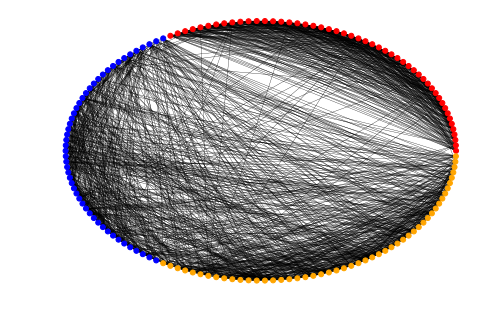

In [7]:
import networkx as nx
N=nx.Graph()
for i in range(150):
    N.add_node(i)
#print(N.nodes())
edglist=[]
for i in range(150):
    for j in range(150):
        if(A[i][j]>0):
            edglist.append((i,j))
#print(edglist)
colorlist=[]
shapelist=[]
N.add_edges_from(edglist)
for i in range(150):
    if(y[i]==0):
        colorlist.append('r')
        #shapelist.append('s')
    elif(y[i]==1):
        colorlist.append('b')
        #shapelist.append('^')
    else:
        colorlist.append('orange')
        #shapelist.append('+')
#print(N.neighbors((data_new[1][0],data_new[1][1])))
#print(N[(data_new[1][0],data_new[1][1])])
nx.draw(N,pos = nx.circular_layout(N),node_color = colorlist,edge_color = 'black',with_labels = False,font_size =5,node_shape='o' ,node_size =25,width=0.3)

plt.show()